In [1]:
import configparser
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
inifile = configparser.ConfigParser()
inifile.read('../config.ini')
df_wine = pd.read_csv(
    inifile.get('url', 'wine'), header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoids phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sequential_backward_selection import SBS

In [3]:
knn = KNeighborsClassifier(n_neighbors=2)

In [4]:
sbs = SBS(knn, k_features=1)

In [5]:
sbs.fit(X_train_std, y_train)

In [6]:
k_feat = [len(k) for k in sbs.subsets_]

In [7]:
plt.plot(k_feat, sbs.scores_, marker='o')

In [8]:
plt.ylim([0.7, 1.1])

(0.7, 1.1)

In [9]:
plt.ylabel('Accuracy')

Text(0,0.5,'Accuracy')

In [10]:
plt.xlabel('Number of features')

Text(0.5,0,'Number of features')

In [11]:
plt.grid()

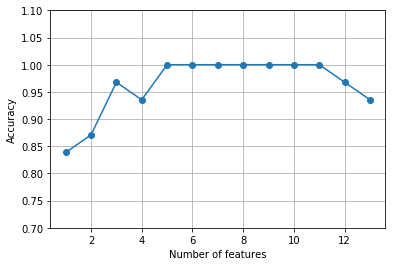

In [12]:
plt.show()

In [13]:
k5 = list(sbs.subsets_[8])

In [16]:
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [17]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
print('Training accuracy:', knn.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [19]:
print('Test accuracy:', knn.score(X_test_std, y_test))

Test accuracy: 0.944444444444


In [20]:
knn.fit(X_train_std[:, k5], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))

Training accuracy: 0.959677419355


In [22]:
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Test accuracy: 0.962962962963
